In [ ]:
#importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix #used to evaluate the performance of a classification algorithm

In [ ]:
#Loading the MNIST Data
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#checking the data type of these arrays
type(X_train)

numpy.ndarray

In [ ]:
#checking the shape of these arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#first value in the X_train.shape signifies the number of images in that array and the second and third value signifies the pixel(dimension) of that image. Y_train.shape has only one value and it stores the label. For example out of the 60000 images there is an image of 3 in X_train.shape array it is converted into a numpy array and stored in the X_train.shape array then the label that is 3 is stored in Y_train.shape array. All the images are grayscale images
#training data = 60000 images
#test data = 10000 images
#Image dimension -> 28x28
#grayscale images -> 1 channel

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


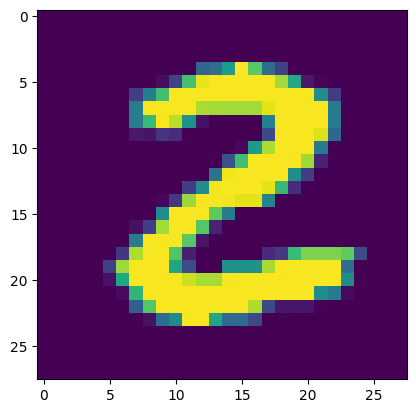

2


In [ ]:
#displaying the image
plt.imshow(X_train[25])
plt.show()
#printing the corresponding label
print(Y_train[25])

In [ ]:
#printing the number of image labels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#we can use this label as such or we can also apply One hot encoding.
#One-Hot Encoding is a technique used in machine learning and data processing to represent categorical variables as binary vectors.
#Suppose you have a dataset with a "Color" column containing categorical values: ["Red", "Green", "Blue"].
#After applying One-Hot Encoding, the representation might look like this:
#"Red" becomes [1, 0, 0]
#"Green" becomes [0, 1, 0]
#"Blue" becomes [0, 0, 1]
#here we will use the labels as such
#all the images have the same dimensions in this dataset if not then we need to resize all the images to a common dimension


In [ ]:
#scaling the values
#normalizing the value which means converting the numbers of wide range into numbers of smaller range without altering the data. Here we have values from 0 to 255 so we can convert them into values from 0 to 1
#this is done to get better accuracy
X_train = X_train/255
X_test = X_test/255

In [ ]:
#printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#building the nerual network
#setting up the layers of the neural network
#activation function are functions that tell a neuron if it should 'fire' or not
#relu is a type of activation function that act like switches for the neurons if the input is positive it lets the input through and if the input is negative it sets the output negative
#sigmoid is also a type of activation function that takes an valued number and squashes it to a value between 0 and 1.
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') #10 here represents the number of classes (i.e from 0 to 9)
])

In [ ]:
#compiling the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#optimizer -> adjusts the model's parameters during the training process to minimize the error or loss function. The goal is to find the optimal set of parameters that allows the neural network to make accurate predictions on new, unseen data.

In [ ]:
#training the neural network
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1355 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1023 - accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0817 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0397 - accuracy: 0.9872
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9884
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.030

In [ ]:
#evaluating our neural network
loss,accuracy = model.evaluate(X_test, Y_test) #we get 2 values one for loss and one for accuracy
print(accuracy)
print(loss)
print(X_test.shape)

313/313 [==============================] - 1s 4ms/step - loss: 0.1034 - accuracy: 0.9749
0.9749000072479248
0.10337290912866592
(10000, 28, 28)


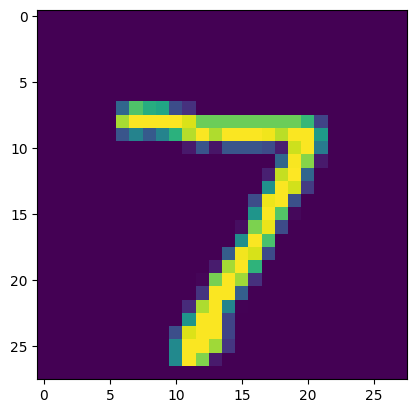

7


In [ ]:
#displaying the first image
plt.imshow(X_test[0])
plt.show()
#printing the true label for this image
print(Y_test[0])

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape) #this will give us 2 values first one represents the number of labels and the second one represents the number of values for each label
print(Y_pred[0]) #will return a list of 10 values and each are probabilities of it being a 0 or 1 or 2 or 3 and so on

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[2.2457851e-05 5.3439487e-02 3.8999283e-01 9.3682200e-01 7.3230399e-07
 2.4918590e-03 9.2758978e-14 9.9999094e-01 1.9708371e-01 1.4567898e-01]


model.predict() gives the predictin probability of each class for that data point

In [ ]:
#converting the prediction probabilities into class label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
#converting the prediction probabilities to class label for all test data points
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test are my true labels and Y_pred_labels represents the predicted Labels

In [ ]:
#A confusion matrix is a performance measurement tool in machine learning that is used to evaluate the performance of a classification algorithm
conf_mat = confusion_matrix(Y_test, Y_pred_label) #first value should be the true label and the second one should be the predicted label
print(conf_mat)

tf.Tensor(
[[ 973    0    0    1    0    1    3    0    2    0]
 [   0 1122    3    2    0    2    2    0    4    0]
 [   7    3 1001    4    2    1    3    4    7    0]
 [   0    0    3  984    0    6    2    4    4    7]
 [   6    0    5    0  946    0    6    2    1   16]
 [   2    0    0    8    1  872    2    1    5    1]
 [   6    2    2    2    4    2  938    0    2    0]
 [   1    6    9    1    1    2    0  996    4    8]
 [   4    0    2    8    3    6    2    1  945    3]
 [   5    5    0    3    6    5    1    7    5  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

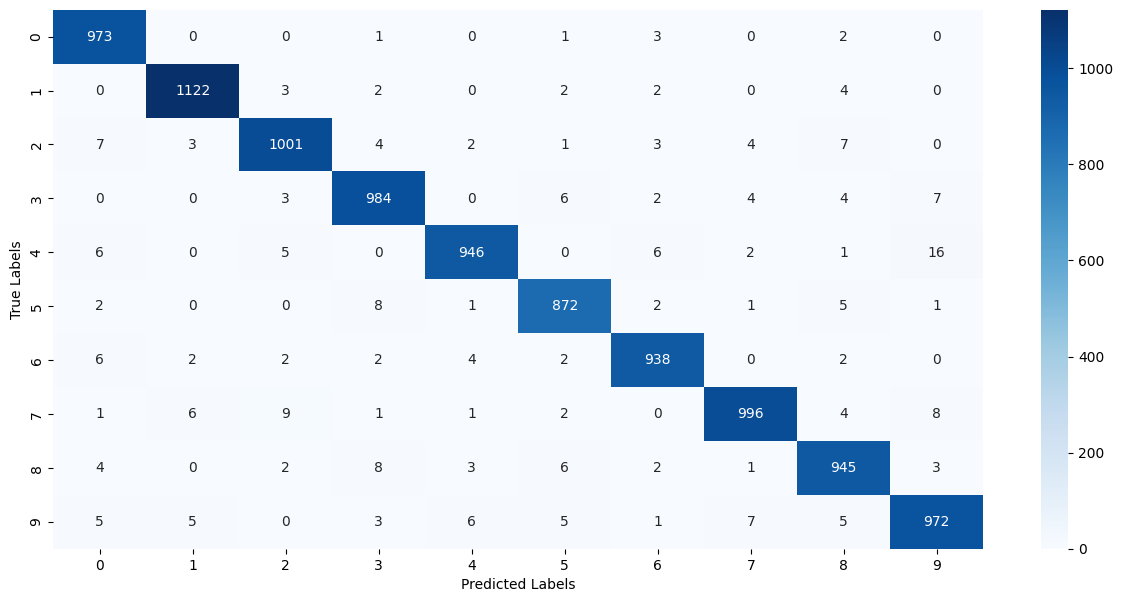

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues') #A heatmap is a graphical representation of data where values in a matrix are represented as colors
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

the diagonal values represents the predicted values by the model

In [ ]:
#building the predictive system
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)
type(input_image)
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


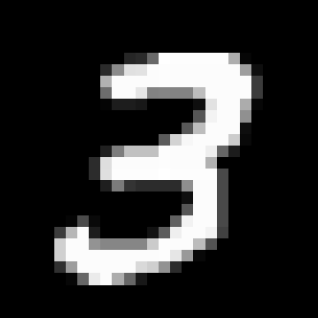

In [ ]:
#displaying the image from the numpy array
cv2_imshow(input_image)

In [ ]:
print(input_image.shape) #even though the image is grayscale the model is reading it in RGB way


(318, 318, 3)


In [ ]:
#converting the image into grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
print(grayscale.shape)

(318, 318)


In [ ]:
#resizing the image into 28x28
input_image_resize = cv2.resize(grayscale, (28,28))
print(input_image_resize.shape)
cv2_imshow(input_image_resize)
input_image_resize = input_image/255

(28, 28)


In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28]) #here 1 represents that at a time we are dealing with only 1 instance and the dimension of the image are 28x28. If we were dealing with RGB images then we need to mention 3 at the end as well

In [ ]:
input_pred = model.predict(image_reshaped)
print(input_pred)
input_pred_label = np.argmax(input_pred)
print(input_pred_label)


1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]
3


Path of the image to be predicted: /content/MNIST_digit.png


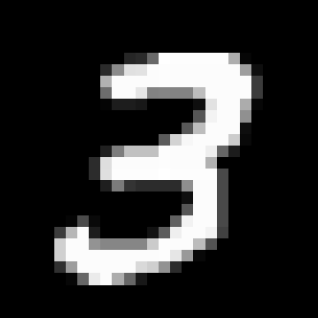

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  3


In [ ]:
#dynamic predictive system
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_pred = model.predict(image_reshaped)
input_pred_label = np.argmax(input_pred)
print('The Handwritten Digit is recognised as ',input_pred_label)